In [ ]:
# encoding=utf8

# Multiple Linear Regression Models - Closed-form solution - Least Squares Method

In [1]:
# Python 3.5 environment
# Load libraries
import datetime
import pandas as pd
import numpy as np
import numpy.matlib
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model, metrics, datasets

from mpl_toolkits.mplot3d import Axes3D, proj3d
from matplotlib.patches import FancyArrowPatch
from IPython import display


### 1. Regression Models Scenario 1 - Multiple Linear Regression (Least Squares Method)

The Auto MPG Data Set is a very old dataset, yet it is perfect to learn multiple linear regression modeling, especially in terms of how to model mixed data (continuous and categorical/multi-valued discrete) to predict a continuous target/dependent variable.

Disclaimer: Terms in Data Science and Statistics differ! "Features" in Data Science used to be called independent variables, also commonly X in Statistics and Math, whereas "target" in Data Science used to be called y or dependent variable in Statistics and represents your "outcome" variable/what you want to predict using some data.




Auto MPG Data Set for Regression Modeling:   
http://archive.ics.uci.edu/ml/datasets/Auto+MPG

Data Description:
1. mpg:           continuous
2. cylinders:     multi-valued discrete
3. displacement:  continuous
4. horsepower:    continuous (contains NaN values indicated as ?)
5. weight:        continuous
6. acceleration:  continuous
7. model_year:    multi-valued discrete
8. origin:        multi-valued discrete
9. car_name:      string (unique for each instance)

First, the dataset is read into a [pandas](http://pandas.pydata.org/pandas-docs/stable/) DataFrame and NaN values are dropped.

In [2]:
df=pd.read_csv('../../DataSets/pybk018master/auto-mpg.data.txt',delim_whitespace=True, header=None,na_values='?')
df.columns=['mpg','cylinders','displacement','horsepower','weight','acceleration',\
            'model_year','origin','car_name']
df.dropna(how='any',axis=0, inplace=True)
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


Let's convert a subset of columns to a regular [numpy](http://www.numpy.org/) array. Conversion between DataFrames and numpy arrays is straight forward. A note to readers coming from [Matlab](https://www.mathworks.com/products/matlab.html): There are some differences between numpy arrays and Matlab matrices that you have to be aware of!!!

*Naming convention:*

- X = *feature matrix* or *independent variables* [2D array, n observations by x features].
- *target* is the *dependent variable* or *y* [1D array, n observations].

Here ```'mpg'``` is the target variable that is predicted via ```'weight'``` and ```'acceleration'```.

In [3]:
X=np.array(df[['weight','acceleration']])
intercept_ones = np.array(np.ones(len(df))).reshape(-1,1) # intercept is expected mean value of target
X=np.concatenate((intercept_ones, X) , axis=1)
target = np.array(df['mpg'])
print('Shape of X:', X.shape)
print('Shape of target:', target.shape)

Shape of X: (392, 3)
Shape of target: (392,)


The mathematical problem statement can be expressed as follows:  

$ X * betas = target $      
Or standard notation is $ A\vec{x} = \vec{b} $     

X and target are known when training the model. Therefore, we have to approximate the betas (the coefficients or weights) as best as we can (there is no exact solution) to later predict new target values. This problem can be solved using the linear least quares method.  

KhanAcademy has excellent tutorials on [linear least quares](https://www.khanacademy.org/math/linear-algebra/alternate-bases/orthogonal-projections/v/linear-algebra-least-squares-approximation).

First the betas are calculated and then used to predict the target variable. These predicted vales can be graphically presented as plane (see graph below).

In [4]:
betas = np.linalg.lstsq(X,target)[0] # np.linalg.solve only if matrix is a square matrix
print('Regression Coefficients with intercept (numpy): \n', betas)
print('Regression Coefficients with intercept (low level less stable numpy): \n', 
      np.linalg.inv(X.T.dot(X)).dot(X.T).dot(target))
target_predict = betas[0]*1 + betas[1]*X[:,1] + betas[2]*X[:,2] # or simply X.dot(beta)


Regression Coefficients with intercept (numpy): 
 [  4.10953288e+01  -7.29309511e-03   2.61650396e-01]
Regression Coefficients with intercept (low level less stable numpy): 
 [  4.10953288e+01  -7.29309511e-03   2.61650396e-01]


In the next cell I compare the results to sklearn's [linear_model.LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Note that you should only "not fit an intercept" when the data is already centered, that is, expected mean value of target is zero.

In [5]:
# use sklearn library
lm = linear_model.LinearRegression(fit_intercept=False) 
# this may be confusing as intercept is already in matrix X  set it False here

lm.fit(X, target)
target_predict2 = lm.predict(X)
print('Sklearn Regression Coefficients with intercept: \n', lm.coef_)

# alternatively you run the following
X1 = np.array(df[['weight','acceleration']])
lm = linear_model.LinearRegression(fit_intercept=True) 
lm.fit(X1, target)
print('Sklearn Regression Coefficients with intercept setting fit_intercept=True: \n', lm.coef_)


Sklearn Regression Coefficients with intercept: 
 [  4.10953288e+01  -7.29309511e-03   2.61650396e-01]
Sklearn Regression Coefficients with intercept setting fit_intercept=True: 
 [-0.0072931  0.2616504]


Above solution is true for using any number of features (from 1 to n features). Below is a graph of the plane we fitted to the data. We fitted the plan as best as we could to predict ```'mpg'```.

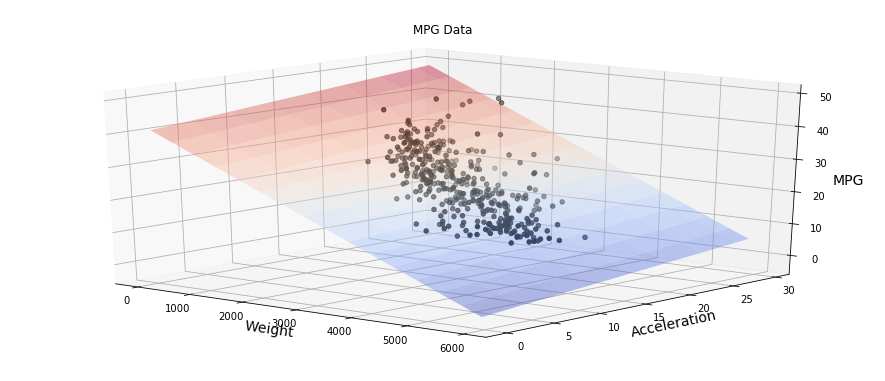

In [6]:
# Plot multiple regression
# Here 2 features -> Fitting a plane, can be visualized
from matplotlib import cm
Xgrid, Ygrid = np.meshgrid(np.arange(0, 6000, 50), np.arange(0, 30, .5))
Zgrid = betas[0]*1 + betas[1]*Xgrid + betas[2]*Ygrid

fig = plt.figure(figsize=(12,5))
ax = Axes3D(fig)
ax.scatter(X[:,1], X[:,2],target, c='k', marker='o')
ax.plot_surface(Xgrid, Ygrid, Zgrid,rstride=8, cstride=8, alpha=0.4,cmap=cm.coolwarm, linewidth=0.2)
ax.set_title('MPG Data')
ax.set_xlabel('Weight',fontsize=14)
ax.set_ylabel('Acceleration',fontsize=14)
ax.set_zlabel('MPG',fontsize=14)
ax.view_init(elev=20, azim=-50)
plt.savefig('MultipleLinearRegression.jpg',dpi=300)

For the statistics folks. Below are calculations to get a measure of the *Goodness of Fit*, namely, *R squared* and *Adjusted R squared*. It tells you how well your model fits the data, that is, in our graph above how well the plane is aligned with the data points.

In [7]:
# numpy/scipy approach: statistics to determine goodness of fit
ssreg = np.sum((target_predict-np.mean(target))**2)
sstotal = np.sum((target-np.mean(target))**2)
ssres = sstotal - ssreg

Rsquared = ssreg/sstotal # same as lm.score(X,target) # this is not adjusted RSquared as below
print('R^2: ', Rsquared)

N=len(X)
df1=2 # 2 features here
df2=N-df1-1
alpha = 0.05
Fvalue = (ssreg/df1)/(ssres/df2)
Fcritical = stats.f.ppf(1-alpha, df1, df2) 

Rsquared_adjusted= 1 - (((1-Rsquared)*(N-1))/(df2))
print('Adjusted R^2: ', Rsquared_adjusted)

R^2:  0.699697930474
Adjusted R^2:  0.698153960965


### 2. Regression Models Scenario 2 - Multiple Linear Regression with mixed data

Above scenario with having continuous features only will not always be the case. You often have to deal with mixed data, that is, some features are continuous while others are categorical. The target variable is still always continuous in this tutorial - if this is not the case with your data you have to look at Logistic Regression or Classification modeling approaches.

Here, with the example data one categorical type of data can be the model years. For demonstration, I only select 3 years and add color to the previous plot to represent the 4D data.

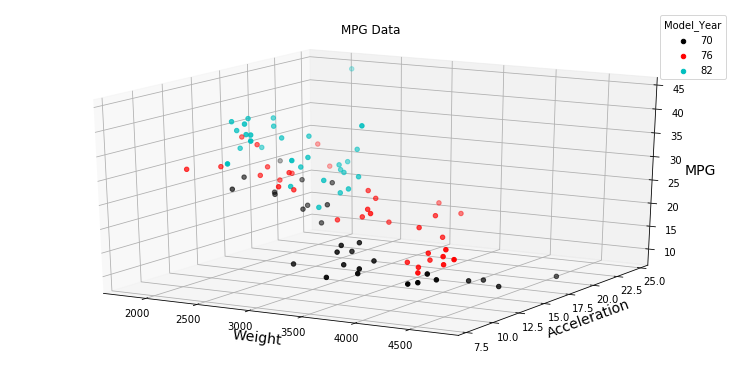

In [8]:
# selecting only model years 70, 76, 82
years=[70, 76, 82]
df2=df[df['model_year'].isin(years)]

# 3D plot
col_list=['k','r','c']
fig = plt.figure(figsize=(10,5))
ax = Axes3D(fig)
i=0
for year in years:
 curr = df2['model_year'] == year   
 ax.scatter(df2['weight'][curr], df2['acceleration'][curr], df2['mpg'][curr], c=col_list[i], marker='o',label=year)
 i+=1
ax.legend(title='Model_Year',loc='upper right')
ax.set_title('MPG Data')
ax.set_xlabel('Weight',fontsize=14)
ax.set_ylabel('Acceleration',fontsize=14)
ax.set_zlabel('MPG',fontsize=14)
ax.view_init(elev=20, azim=-60)


The only difference to Scenario 1 is that the categorical data has to be encoded as numbers representing their category. However, numbers such as 1, 2 and 3 would imply *ordinality*, that is, 3 is larger than 1, whereas in reality it is just a different category. To overcome this issue, people perform **one-hot-encoding** or **dummy encoding**. It basically expands the categorical vector to n vectors (one for each category) and only assigns a 1 for the respective category, otherwise 0. With expanding I literally mean instead of one column in your feature matrix/DataFrame you have as many columns as unique categories, here 3!

In [9]:
# get dummy variables one model_year / one hot encoding (alternatively use sklearn library)
df2=pd.get_dummies(df2, prefix=None, prefix_sep='_', dummy_na=False, columns=['model_year'], sparse=False)
df2[['weight','acceleration','model_year_70','model_year_76','model_year_82']].sample(n=10)

### RERUN above cell if you can an error tha model_year is not contained in df, 
### the original categorical feature gets got dropped

,weight,acceleration,model_year_70,model_year_76,model_year_82
383,1965.0,15.0,0,0,1
24,2648.0,15.0,1,0,0
372,2735.0,18.0,0,0,1
369,2395.0,18.0,0,0,1
212,4380.0,12.1,0,1,0
25,4615.0,14.0,1,0,0
214,3870.0,15.0,0,1,0
187,4215.0,13.0,0,1,0
8,4425.0,10.0,1,0,0
367,2605.0,19.6,0,0,1


In [10]:
# prepare feature data matrix and target variable
X=np.array(df2[['weight','acceleration','model_year_70','model_year_76','model_year_82']])
intercept_ones = np.array(np.ones(len(df2))).reshape(-1,1)
X=np.concatenate((intercept_ones, X) , axis=1)
target = np.array(df2['mpg'])

# numpy approach: minimize sum of squared deviations (least squares)
betas = np.linalg.lstsq(X,target)[0] 
target_predict = X.dot(betas)


# use sklearn library
lm = linear_model.LinearRegression(fit_intercept=False)
lm.fit(X, target)
target_predict2 = lm.predict(X)
Rsquared=lm.score(X,target)
print('R^2: ', Rsquared)

R^2:  0.876693023311
